# <b> <font color = blue>Gradient Descent for Logistic Regression<font> </b>

In [4]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import sys 
sys.path.append('Material_By_DeepLearning/')
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./Material_By_DeepLearning/deeplearning.mplstyle')
'run sucessfully'

'run sucessfully'

## Data set 
Let's start with the same two feature data set used in the decision boundary lab.

In [21]:
x_train = np.array([0., 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14])
y_train = np.array([0,  0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,1])

In [13]:
# lets make a sigmoid function 
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
def Compute_Cost(x, y ,w ,b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    cost = 0
    row = x.shape[0]
    for i in range(0,row):
        
        z = np.dot(w,x[i])+b
        f_wb = Sigmoid(z)
        
        cost += ((y[i])*(np.log(f_wb))) + (1-y[i])*(np.log(1-f_wb))
        
    cost = -(cost/row)
    return cost

## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [15]:
def Compute_Gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    

    row = x.shape[0]
    dj_dw = 0
        
#     print(dj_dw.shape)
    dj_db = 0
    for i in range(0,row):
        z = np.dot(w,x[i])+b
        f_wb = sigmoid(z)
        error = f_wb - y[i]
        
        dj_dw += error * x[i] 
            
        #now dj_db
        dj_db += error
        
    #final dj_dw and dj_db
    dj_dw = dj_dw/row
    dj_db = dj_db/row
    
    return dj_dw,dj_db

print("run sucessfully")

run sucessfully


In [16]:
def Compute_Gradient_Descent(x, y, w, b, alpha, iteration):
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    
    j_History=[]
    
    for i in range (0, iteration):
        # let's take dj_dw and dj_db 
        dj_dw, dj_db = Compute_Gradient(x, y, w, b)

        #updating paramters for the w
        #using loop beacuse each parametre of each feature needs to update 
        w = w - alpha*(dj_dw)
        
        #updating parameter b
        b -= alpha*(dj_db)
        
        # so now it's time to store cost of an function 
        if i<10000:
            j_History.append(Compute_Cost(x, y ,w ,b))
        
        if (i%1000 == 0):
            print(f"the iteration {i} has cost: {j_History[-1]}")
    
    return w, b, j_History

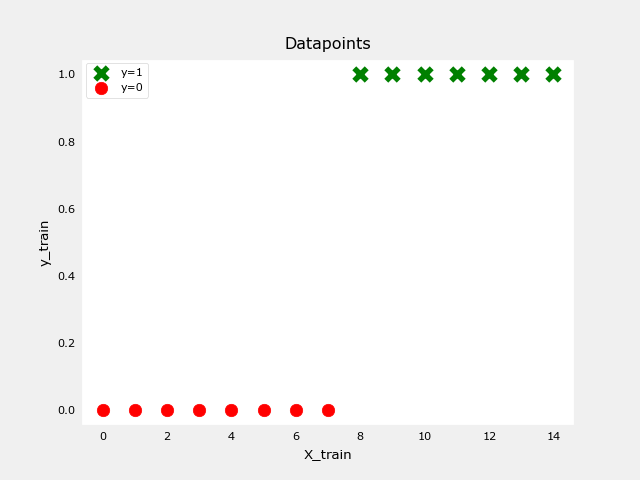

In [17]:
# lets plot data frist
_,ax = plt.subplots(1,1)
pos = y_train == 1
neg = y_train == 0
ax.scatter(x_train[pos],y_train[pos],marker='x',s=80,c="green",label="y=1")
ax.scatter(x_train[neg],y_train[neg],marker='o',s=80,c="red" ,label="y=0")
ax.set_xlabel("X_train")
ax.set_ylabel("y_train")
ax.set_title("Datapoints")
ax.legend()
plt.show()

In [22]:
# now lets find w and b 
x_train.shape
w = 0
b = 0
alpha = 0.1
iteration = 10000
w, b, history = Compute_Gradient_Descent(x_train, y_train, w, b, alpha, iteration)

print(f"final w is {w} and b is {b}")

the iteration 0 has cost: 0.6600020366712508
the iteration 1000 has cost: 0.41221852966053313
the iteration 2000 has cost: 0.4114388915068114
the iteration 3000 has cost: 0.4114238086649814
the iteration 4000 has cost: 0.41142347509845195
the iteration 5000 has cost: 0.4114234675815115
the iteration 6000 has cost: 0.4114234674116423
the iteration 7000 has cost: 0.41142346740780206
the iteration 8000 has cost: 0.4114234674077152
the iteration 9000 has cost: 0.41142346740771324
final w is 0.484779184909523 and b is -3.6489834016935436


x:  [0, 7.527104123446582]
y:  [7.527104123446582, 0]


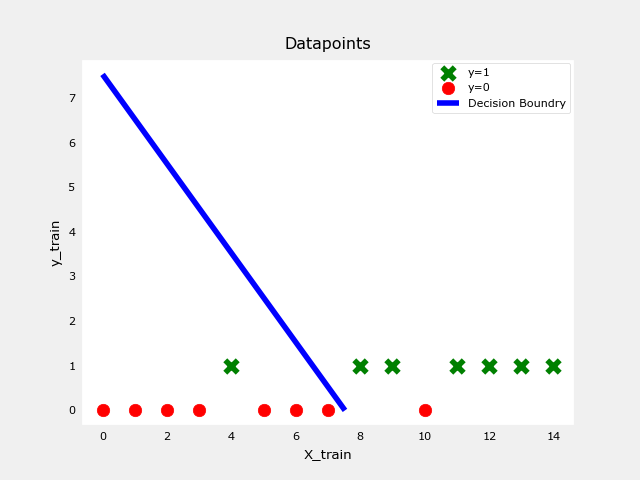

In [23]:
# now lets plot decision boundry 
point = - b/w
y = [point,0]
x = [0,point]

print("x: ",x)
print("y: ",y)

_,ax = plt.subplots(1,1)
pos = y_train == 1
neg = y_train == 0
ax.scatter(x_train[pos],y_train[pos],marker='x',s=80,c="green",label="y=1")
ax.scatter(x_train[neg],y_train[neg],marker='o',s=80,c="red" ,label="y=0")
ax.set_xlabel("X_train")
ax.set_ylabel("y_train")
ax.set_title("Datapoints")

ax.plot(x,y,c="blue",label="Decision Boundry")

ax.legend()
plt.show()


## because of this only we does't gradient descent on the 1d input array insed we choose threshold point as 0.5